# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

btc_url = btc_url + '?format=json'
eth_url = eth_url + '?format=json'

display((btc_url))
display((eth_url))

'https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD?format=json'

'https://api.alternative.me/v2/ticker/Ethereum/?convert=USD?format=json'

In [5]:
import json

In [6]:
# Fetch current BTC price
btc_response = requests.get(btc_url)
btc_response_data = btc_response.json()
btc_price = btc_response_data['data']['1']['quotes']['USD']['price']
# Fetch current ETH price
eth_response = requests.get(eth_url)
eth_response_data = eth_response.json()
eth_price = eth_response_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")


The current value of your 1.2 BTC is $35588.40
The current value of your 5.3 ETH is $10562.64


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [9]:
# Format current date as ISO format
today = pd.Timestamp("2023-05-4", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

#df_portfolio

# Reorganize the DataFrame
# Separate ticker data
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol',axis=1)
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol',axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([SPY,AGG],axis=1,keys=['SPY','AGG'])

# Preview DataFrame
df_portfolio

SPY                                    \
                             open    high     low   close    volume   
timestamp                                                             
2023-05-04 04:00:00+00:00  406.93  407.27  403.74  405.13  90789720   

                                                     AGG                  \
                          trade_count        vwap   open     high    low   
timestamp                                                                  
2023-05-04 04:00:00+00:00      689040  405.497495  99.77  100.415  99.75   

                                                                   
                           close   volume trade_count        vwap  
timestamp                                                          
2023-05-04 04:00:00+00:00  99.97  5114820       24443  100.097889

In [10]:
# Pick AGG and SPY close prices
spy_close_price = df_portfolio['SPY']['close'][0]
agg_close_price = df_portfolio['AGG']['close'][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $99.97
Current SPY closing price: $405.13


In [11]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20256.50
The current value of your 200 AGG shares is $19994.00


### Savings Health Analysis

In [12]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
values_data = {
    "values": [my_spy_value + my_agg_value,
               my_btc_value + my_eth_value]}

savings_categories = ['shares','crypto']

# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame(values_data,index=savings_categories)

# Display savings DataFrame
display(df_savings)

,values
shares,40250.500
crypto,46151.035


array([<Axes: ylabel='values'>], dtype=object)

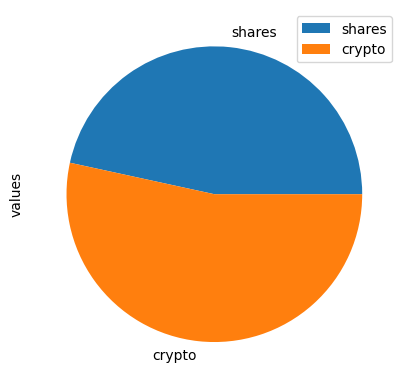

In [13]:
# Plot savings pie chart
df_savings.plot.pie(subplots=True)

In [14]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings['values'].sum()

# Validate saving health
if total_savings > emergency_fund:
    print('Congratulations! You have fully funded your emergency fund, and then some!')
elif total_savings == emergency_fund:
    print(f'Well done! Your emergency fund is at the optimal ${emergency_fund} level.')
else:
    print(f'You only have ${total_savings} in your emergency fund. To be prepared, please add ${emergency_fund-total_savings}.')


Congratulations! You have fully funded your emergency fund, and then some!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [16]:
# Get 5 years' worth of historical data for SPY and AGG
# using tickers and timeframe variables from before

tickers = ["AGG", "SPY"]
timeframe = "1Day"

df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol',axis=1)
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol',axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([SPY,AGG],axis=1,keys=['SPY','AGG'])

# Display sample data
df_stock_data.head()

SPY                                       \
                             open    high     low     close     volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  206.92  208.18  206.41  207.9700   61908515   
2016-05-03 04:00:00+00:00  206.52  206.80  205.28  206.1592  106422142   
2016-05-04 04:00:00+00:00  204.99  205.85  204.42  205.0100   92199810   
2016-05-05 04:00:00+00:00  205.56  205.98  204.47  204.9700   67597222   
2016-05-06 04:00:00+00:00  204.08  205.77  203.88  205.7200   89131004   

                                                      AGG                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2016-05-02 04:00:00+00:00      263580  207.294812  110.74  110.7400  110.5200   
2016-05-03 04:00:00+00:00      377518  206.312060  110.89  110.9450  110.7500   
2016-05-04 04:00:00+00:00      345261  205.090172  110.91  110.9315  110.7595   
2016-05-05 04:00:00+00:00      280622  205.141555  110.92  111.1600  110.8010   
2016-05-06 04:00:00+00:00      340335  204.937074  111.12  111.1200  110.9700   

                                                                     
                             close   volume trade_count        vwap  
timestamp                                                            
2016-05-02 04:00:00+00:00  110.605  3553939       15119  110.627199  
2016-05-03 04:00:00+00:00  110.810  3044940       15662  110.865995  
2016-05-04 04:00:00+00:00  110.860  2920608       13982  110.879063  
2016-05-05 04:00:00+00:00  111.140  3008142       15707  111.028363  
2016-05-06 04:00:00+00:00  110.970  2718710       12697  111.031967

In [17]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_sixtyforty = MCSimulation(
    portfolio_data=df_stock_data,
    weights=[.6,.4],
    num_simulation=500,
    num_trading_days= 252*30
)

In [18]:
# Printing the simulation input data
MC_sixtyforty.portfolio_data.head()

SPY                                       \
                             open    high     low     close     volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  206.92  208.18  206.41  207.9700   61908515   
2016-05-03 04:00:00+00:00  206.52  206.80  205.28  206.1592  106422142   
2016-05-04 04:00:00+00:00  204.99  205.85  204.42  205.0100   92199810   
2016-05-05 04:00:00+00:00  205.56  205.98  204.47  204.9700   67597222   
2016-05-06 04:00:00+00:00  204.08  205.77  203.88  205.7200   89131004   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00      263580  207.294812          NaN  110.74   
2016-05-03 04:00:00+00:00      377518  206.312060    -0.008707  110.89   
2016-05-04 04:00:00+00:00      345261  205.090172    -0.005574  110.91   
2016-05-05 04:00:00+00:00      280622  205.141555    -0.000195  110.92   
2016-05-06 04:00:00+00:00      340335  204.937074     0.003659  111.12   

                                                                             \
                               high       low    close   volume trade_count   
timestamp                                                                     
2016-05-02 04:00:00+00:00  110.7400  110.5200  110.605  3553939       15119   
2016-05-03 04:00:00+00:00  110.9450  110.7500  110.810  3044940       15662   
2016-05-04 04:00:00+00:00  110.9315  110.7595  110.860  2920608       13982   
2016-05-05 04:00:00+00:00  111.1600  110.8010  111.140  3008142       15707   
2016-05-06 04:00:00+00:00  111.1200  110.9700  110.970  2718710       12697   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  110.627199          NaN  
2016-05-03 04:00:00+00:00  110.865995     0.001853  
2016-05-04 04:00:00+00:00  110.879063     0.000451  
2016-05-05 04:00:00+00:00  111.028363     0.002526  
2016-05-06 04:00:00+00:00  111.031967    -0.001530

In [19]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_sixtyforty.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 110.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 120.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 130.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 140.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 150.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 160.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 170.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 180.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 190.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 200.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 210.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 220.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 230.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 240.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 250.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 260.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 270.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 280.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 290.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 300.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 310.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 320.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 330.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 340.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 350.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 360.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 370.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 380.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 390.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 400.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 410.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 420.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 430.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 440.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 450.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 460.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 470.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 480.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 490.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991677,1.000777,1.004012,1.008868,0.996107,1.009059,1.010396,0.990833,1.004295,0.992034,...,0.989905,1.000242,1.004257,1.003198,1.004832,1.005914,1.000472,1.000508,1.000109,1.006182
2,0.984294,1.003844,0.988020,1.016960,0.994818,1.006837,1.021072,0.977214,1.014978,0.989600,...,0.990797,0.995200,0.999990,1.014312,1.001401,1.010823,1.009402,0.997973,1.003866,1.010248
3,0.987772,1.018999,0.991590,1.018983,0.984201,1.011568,1.012223,0.981639,1.010636,0.991240,...,0.991944,0.997726,0.994181,1.009242,0.994228,1.002345,1.014416,0.993666,0.998208,1.005414
4,0.992987,1.022691,0.984732,1.021010,0.992517,1.006874,1.001803,0.994745,1.009895,0.995037,...,0.998962,1.003470,0.990081,0.999038,0.999266,1.001934,1.016531,0.998429,1.003374,1.007458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,11.747538,6.321452,22.286086,37.124824,15.242927,18.485442,18.566450,6.563209,28.390035,14.702820,...,17.729195,13.708062,13.584019,15.184205,23.734426,4.828026,8.291495,9.892853,21.536433,26.349301
7557,11.705440,6.341552,22.396179,37.005846,15.357019,18.460513,18.596535,6.621304,27.987939,14.795244,...,17.841679,13.693380,13.526698,15.138903,23.749746,4.890479,8.340422,9.822639,21.480293,26.254435
7558,11.712565,6.382518,22.461126,37.174871,15.244362,18.483196,18.828181,6.643896,27.955613,14.860764,...,17.848479,13.700822,13.475664,15.114395,23.952460,4.860132,8.350878,9.925545,21.645438,26.066920
7559,11.736789,6.366073,22.414353,37.276254,15.240781,18.475877,18.880980,6.645657,28.026452,15.024146,...,17.872141,13.742520,13.404212,15.126918,23.995069,4.845646,8.342988,9.936574,21.560764,26.019055


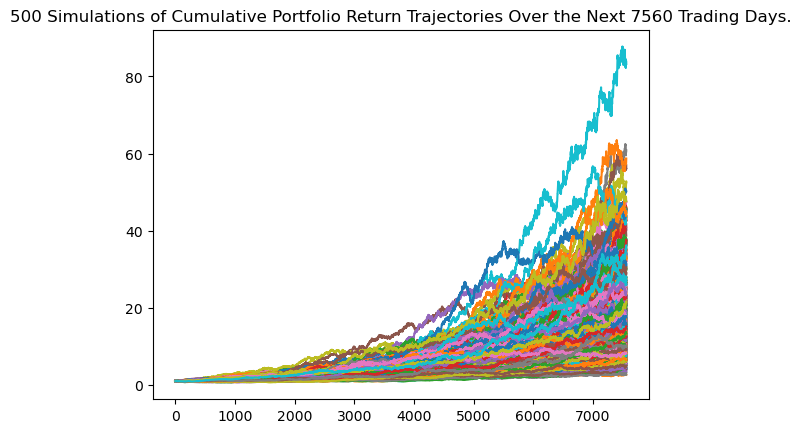

In [20]:
# Plot simulation outcomes
MC_sixtyforty_line_plot = MC_sixtyforty.plot_simulation()

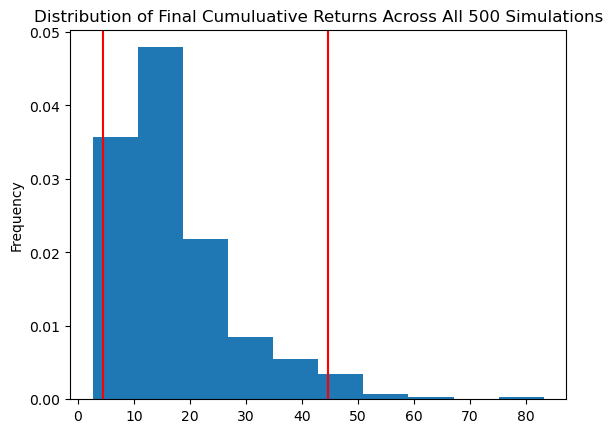

In [21]:
# Plot probability distribution and confidence intervals
MC_sixtyforty_dist_plot = MC_sixtyforty.plot_distribution()

### Retirement Analysis

In [22]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_sixtyforty_tbl = MC_sixtyforty.summarize_cumulative_return()

# Print summary statistics
print(MC_sixtyforty_tbl)

count           500.000000
mean             17.460974
std              10.672041
min               2.675672
25%              10.235374
50%              14.626565
75%              21.701100
max              83.233562
95% CI Lower      4.470228
95% CI Upper     44.776737
Name: 7560, dtype: float64


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [23]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(MC_sixtyforty_tbl[8]*initial_investment,2)
ci_upper = round(MC_sixtyforty_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $89404.57 and $895534.75


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [24]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(MC_sixtyforty_tbl[8]*initial_investment,2)
ci_upper = round(MC_sixtyforty_tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $134106.85 and $1343302.12


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [25]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data=df_stock_data,
    weights=[.6,.4],
    num_simulation=500,
    num_trading_days= 252*5
)

MC_fiveyear.portfolio_data.head()

SPY                                       \
                             open    high     low     close     volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  206.92  208.18  206.41  207.9700   61908515   
2016-05-03 04:00:00+00:00  206.52  206.80  205.28  206.1592  106422142   
2016-05-04 04:00:00+00:00  204.99  205.85  204.42  205.0100   92199810   
2016-05-05 04:00:00+00:00  205.56  205.98  204.47  204.9700   67597222   
2016-05-06 04:00:00+00:00  204.08  205.77  203.88  205.7200   89131004   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00      263580  207.294812          NaN  110.74   
2016-05-03 04:00:00+00:00      377518  206.312060    -0.008707  110.89   
2016-05-04 04:00:00+00:00      345261  205.090172    -0.005574  110.91   
2016-05-05 04:00:00+00:00      280622  205.141555    -0.000195  110.92   
2016-05-06 04:00:00+00:00      340335  204.937074     0.003659  111.12   

                                                                             \
                               high       low    close   volume trade_count   
timestamp                                                                     
2016-05-02 04:00:00+00:00  110.7400  110.5200  110.605  3553939       15119   
2016-05-03 04:00:00+00:00  110.9450  110.7500  110.810  3044940       15662   
2016-05-04 04:00:00+00:00  110.9315  110.7595  110.860  2920608       13982   
2016-05-05 04:00:00+00:00  111.1600  110.8010  111.140  3008142       15707   
2016-05-06 04:00:00+00:00  111.1200  110.9700  110.970  2718710       12697   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  110.627199          NaN  
2016-05-03 04:00:00+00:00  110.865995     0.001853  
2016-05-04 04:00:00+00:00  110.879063     0.000451  
2016-05-05 04:00:00+00:00  111.028363     0.002526  
2016-05-06 04:00:00+00:00  111.031967    -0.001530

In [26]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 110.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 120.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 130.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 140.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 150.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 160.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 170.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 180.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 190.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 200.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 210.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 220.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 230.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 240.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 250.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 260.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 270.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 280.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 290.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 300.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 310.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 320.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 330.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 340.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 350.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 360.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 370.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 380.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 390.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 400.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 410.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 420.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 430.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 440.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 450.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 460.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 470.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 480.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 490.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010084,1.001453,0.994805,1.007360,0.990567,0.993448,0.997206,1.006531,1.006377,0.995808,...,0.992737,1.002630,1.000773,0.985807,1.009502,1.007717,1.015026,1.006533,0.993324,0.997984
2,1.009511,1.014987,1.005859,1.009431,1.001256,0.989427,1.008273,1.001357,1.006686,0.997059,...,0.986837,1.019804,1.000322,0.989194,0.998778,1.011227,1.023133,1.010229,0.995173,0.989546
3,1.007125,1.011299,1.003871,1.020615,0.993991,0.979769,1.008719,0.997986,0.997936,0.996492,...,0.979698,1.023942,1.003391,0.986610,0.991425,1.012394,1.031978,1.019223,0.988714,0.993512
4,1.008025,1.016577,1.010623,1.009997,0.999731,0.994598,0.996778,0.995729,1.000786,0.999899,...,0.972604,1.035059,1.002667,0.991899,0.986162,1.017999,1.030757,1.024938,0.977893,0.993147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.109061,1.251533,1.156909,1.837466,1.571716,1.523135,1.791105,1.424654,1.390238,1.636281,...,2.028617,2.043488,1.586131,2.336510,1.591598,2.607680,1.193516,1.982797,1.941024,1.260925
1257,1.112084,1.249856,1.152958,1.821356,1.557708,1.505388,1.810591,1.433327,1.408895,1.640472,...,2.013132,2.059111,1.602007,2.319490,1.599529,2.603200,1.195834,1.976546,1.937961,1.265043
1258,1.122693,1.245509,1.139962,1.832961,1.556211,1.501469,1.819055,1.429328,1.415994,1.630445,...,2.023404,2.039965,1.603705,2.287273,1.603714,2.596247,1.192319,1.987059,1.957670,1.270646
1259,1.122896,1.250880,1.142325,1.833101,1.556281,1.480717,1.829284,1.419719,1.425155,1.639095,...,2.004862,2.034109,1.589502,2.267774,1.608182,2.591421,1.205329,1.984155,1.960115,1.283176


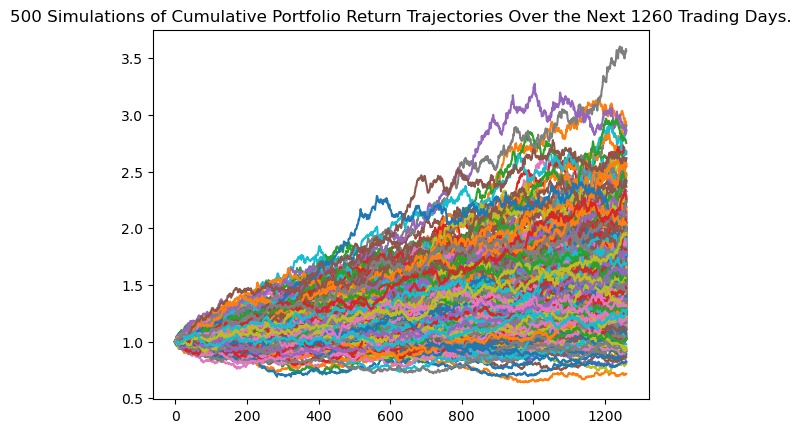

In [27]:
# Plot simulation outcomes
MC_fiveyear_line_plot = MC_fiveyear.plot_simulation()

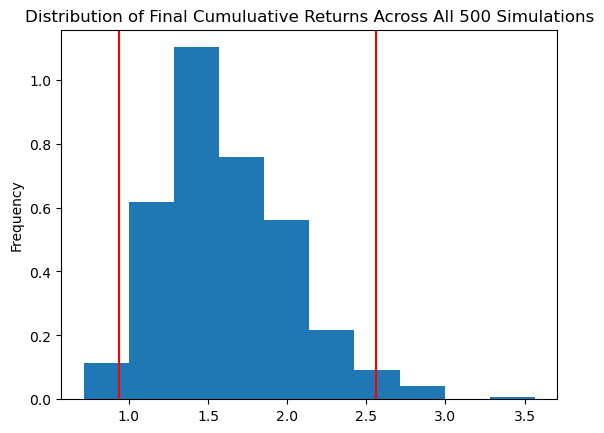

In [28]:
# Plot probability distribution and confidence intervals
MC_fiveyear_dist_plot = MC_fiveyear.plot_distribution()

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_fiveyear_tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(MC_fiveyear_tbl)

count           500.000000
mean              1.621110
std               0.411794
min               0.715419
25%               1.327846
50%               1.551053
75%               1.864903
max               3.565320
95% CI Lower      0.938641
95% CI Upper      2.558136
Name: 1260, dtype: float64


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [30]:
# Set initial investment
initial_investment = 100000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(MC_fiveyear_tbl[8]*initial_investment,2)
ci_upper_five = round(MC_fiveyear_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $100000 in the portfolio over the next 5 years will end within in the range of $93864.09 and $255813.6


### Ten Years Retirement Option

In [31]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear = MCSimulation(
    portfolio_data=df_stock_data,
    weights=[.9,.1],
    num_simulation=500,
    num_trading_days= 252*10
)

MC_tenyear.portfolio_data.head()

SPY                                       \
                             open    high     low     close     volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  206.92  208.18  206.41  207.9700   61908515   
2016-05-03 04:00:00+00:00  206.52  206.80  205.28  206.1592  106422142   
2016-05-04 04:00:00+00:00  204.99  205.85  204.42  205.0100   92199810   
2016-05-05 04:00:00+00:00  205.56  205.98  204.47  204.9700   67597222   
2016-05-06 04:00:00+00:00  204.08  205.77  203.88  205.7200   89131004   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00      263580  207.294812          NaN  110.74   
2016-05-03 04:00:00+00:00      377518  206.312060    -0.008707  110.89   
2016-05-04 04:00:00+00:00      345261  205.090172    -0.005574  110.91   
2016-05-05 04:00:00+00:00      280622  205.141555    -0.000195  110.92   
2016-05-06 04:00:00+00:00      340335  204.937074     0.003659  111.12   

                                                                             \
                               high       low    close   volume trade_count   
timestamp                                                                     
2016-05-02 04:00:00+00:00  110.7400  110.5200  110.605  3553939       15119   
2016-05-03 04:00:00+00:00  110.9450  110.7500  110.810  3044940       15662   
2016-05-04 04:00:00+00:00  110.9315  110.7595  110.860  2920608       13982   
2016-05-05 04:00:00+00:00  111.1600  110.8010  111.140  3008142       15707   
2016-05-06 04:00:00+00:00  111.1200  110.9700  110.970  2718710       12697   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  110.627199          NaN  
2016-05-03 04:00:00+00:00  110.865995     0.001853  
2016-05-04 04:00:00+00:00  110.879063     0.000451  
2016-05-05 04:00:00+00:00  111.028363     0.002526  
2016-05-06 04:00:00+00:00  111.031967    -0.001530

In [32]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 110.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 120.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 130.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 140.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 150.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 160.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 170.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 180.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 190.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 200.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 210.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 220.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 230.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 240.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 250.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 260.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 270.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 280.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 290.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 300.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 310.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 320.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 330.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 340.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 350.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 360.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 370.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 380.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 390.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 400.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 410.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 420.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 430.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 440.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 450.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 460.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 470.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 480.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 490.


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWar

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998849,0.987848,1.004876,1.011355,0.999632,0.997004,1.017291,0.993845,0.986436,1.008516,...,1.002953,1.000821,1.008054,0.991964,1.000128,1.020605,0.976821,0.997969,0.993223,1.009713
2,0.988328,0.987733,0.982923,1.028408,0.994676,0.986307,1.022490,0.971839,0.977103,1.007341,...,0.999388,0.997921,1.014261,1.003346,1.000383,1.009227,0.978581,1.004851,1.013020,1.012338
3,0.991836,0.996517,0.987183,1.035829,1.011843,0.988511,1.007254,0.967467,0.974066,1.010018,...,1.008223,1.004940,1.026726,0.986834,1.003339,1.008893,0.968672,1.011285,0.984903,1.007530
4,0.985303,0.985875,0.992647,1.030672,0.995886,0.990839,1.004181,0.971374,0.988699,1.013185,...,1.000738,1.010690,1.025044,0.997657,1.006042,0.996825,0.940484,1.017177,0.983422,1.025324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.344829,3.778922,3.621542,6.751784,7.659320,3.224313,5.709101,4.198112,2.531992,2.777232,...,3.426336,2.346338,3.802153,4.786991,4.413672,4.620535,2.796465,3.221906,6.678033,2.883787
2517,2.314151,3.735989,3.575517,6.695521,7.773741,3.285519,5.708448,4.264691,2.506180,2.768626,...,3.418522,2.358506,3.805810,4.828628,4.404069,4.561125,2.770526,3.312648,6.751237,2.870214
2518,2.309344,3.690332,3.567569,6.759184,7.874703,3.292944,5.765370,4.252526,2.486616,2.717038,...,3.446299,2.348357,3.820102,4.885322,4.436129,4.599105,2.745483,3.210448,6.666063,2.904047
2519,2.311951,3.669286,3.610764,6.639027,7.847051,3.313429,5.699026,4.270051,2.448538,2.696951,...,3.453248,2.375011,3.822304,4.843998,4.447570,4.615096,2.741421,3.185017,6.744000,2.883844


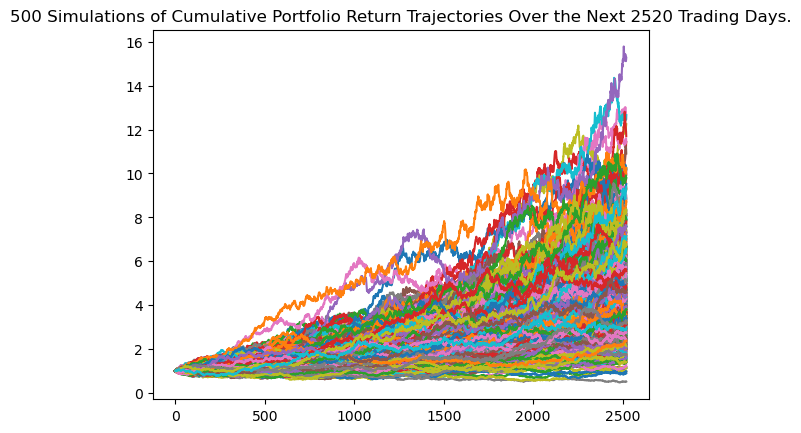

In [33]:
# Plot simulation outcomes
MC_tenyear_line_plot = MC_tenyear.plot_simulation()

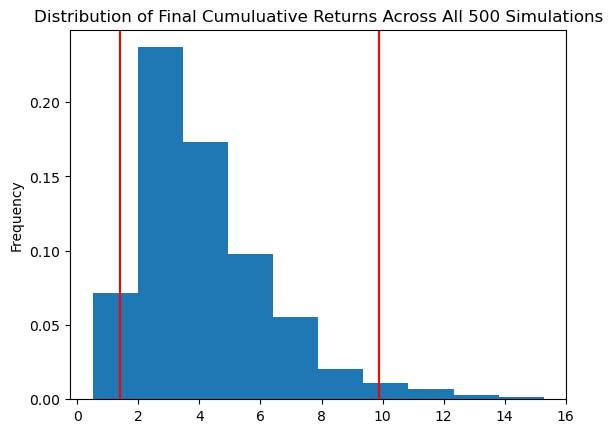

In [34]:
# Plot probability distribution and confidence intervals
MC_tenyear_dist_plot = MC_tenyear.plot_distribution()

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_tenyear_tbl = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
print(MC_tenyear_tbl)

count           500.000000
mean              4.163645
std               2.193600
min               0.508756
25%               2.554740
50%               3.653139
75%               5.325980
max              15.277554
95% CI Lower      1.386323
95% CI Upper      9.878120
Name: 2520, dtype: float64


C:\Users\giffo\Desktop\FinTech\python-homework\Mod5Challenge\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [36]:
# Set initial investment
initial_investment = 100000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(MC_tenyear_tbl[8]*initial_investment,2)
ci_upper_ten = round(MC_tenyear_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $100000 in the portfolio over the next 10 years will end within in the range of $138632.31 and $987811.99


# Final Analysis

## Expected Returns (%)
*Please note: The above simulations have been run again since this analysis. Specific return percentages mentioned below may differ slightly from what is currently shown above.* 

### Five Year
- 60/40: 2% LOSS to 160% gain
- 90/10: 10% LOSS to 324% gain

### Ten Year
- 60/40: 22-452% gain
- 90/10: 26-866% gain

### Thirty Year
- 60/40 (Base Case): 343-4642% gain
- 90/10: 817-29023% gain


The Five Year portfolios do not come close to meeting the benchmarks of the 30Yr 60/40 portfolio, and their Lower CIs indicate a potential 2-10% loss over the duration of the investment. 

The Ten Year portfolios are slightly more competitive on their Upper CIs, and the Lower CIs at least indicate some modest gains. If a client is late to investing, the 10Yr 90/10 would be the way to salvage some lost gains.

The Thirty Years are by far and away the best options, with the Lowest CI (on 60/40) indicating growth of 3.4x on the initial investment. I would personally choose to invest in accordance with the Thirty Year 90/10 portfolio; while the risk is greater due to weighting equities more heavily, even the Lower CI represents an 8x on the initial investment, while the Upper CI indicates the potential to be closer to a whopping 290x. 

Based on this analysis, it is clear that there is no true substitute for time spent in the market, illustrating the importance of compound growth. 